# Scikit-Learn Practice Exercises

This notebook offers a set of exercises for different tasks with Scikit-Learn.

In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbr of "pd"
import pandas as pd
# Import numpy under the abbr of "np"
import numpy as np

## End-to-end Scikit-Learn Classification workflow

Let's start with an end-to-end Scikit-learn workflow

More specifically we'll,

1. Get a dataset ready
2. Prepare a machine learning model to make predictions
3. Fit the model to the data and make a prediction
4. Evaluate the model's predictions

The data we'll be using is in repo. We'll start with `heart-disease.csv`, a dataset which contains anonymous patient data and whether or not they have heart disease.

### 1. Getting a dataset ready

In [2]:
# import the heart disease dataset and save it to a variable
heart_disease = pd.read_csv("heart-disease.csv")

# check the first 5 rows of the data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Our goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

In essence, the `target` column is our **target variable**(also called `y` or `labels`) and the rest of the other columns are our independent variables (also called `data` or `X`)

And since our target variable is one thing or another (heart disease or not), we know our problem is a classification problem(classifying whether something is one thing or another).

Knowing this, let's create `X` and `y` by splitting our dataframe up.

In [3]:
# Create X (all columns except target)
X = heart_disease.drop("target", axis=1)

# Create y (only the target column)
y = heart_disease["target"]

Now we've split our data into `X` and `y`, we'll use Scikit-learn to split it into training and test sets.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# View the different shapes of the training and test datasets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Since our data is now ready and splitted into training and test sets, we'll build a machine learning model to fit patterns in the training data and then make predictions using test data.

To choose which estimator we'll use, We can go through Scikit-learn's machine learning map.

After following the map, we decided to use the `RandomForestClassifier`

### 2. Picking a machine learning model

In [6]:
# import RandomForestClassifer
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier
clf = RandomForestClassifier()

Now we've got a `RandomForestClassifier` instance, let's fit it to the training data.

Once it's fit, we'll make predictions on the test data.

### 3. Fitting a model and making predictions

In [7]:
# fit the RandomForestClassifier with the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# Use the fitted model to make predictions on the test data and save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)

### 4. Evaluating a model's predictions

Evaluating predictions is as important making them. Let's check how our model did by calling the `score()` method on it and passing it the training (`X_train`,`y_train`) and testing data(`X_test`,`y_test`)

In [9]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train, y_train)

1.0

In [10]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.7540983606557377

## Experimenting with different classification models

For this exercise, the models we're going to try and compare are:
* LinearSVC
* KNeighborsClassifier(Also known as K-Nearest Neighbors or KNN)
* SVC(also known as support vector classifier, a form of support vector machine)
* LogisticRegression(despite the name, this is actually a classifier)
* RandomForestClassifier(an ensemble method and what we used above)

We'll follow the same workflow we used above (except this time for multiple models):
1. Import a machine learning model
2. Get it ready
3. Fit it to the data and make predictions
4. Evaluate the fitted model

**Note**: Since we've already got the data ready, we can reuse it in this section.

In [11]:
# Import LinearSVC
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import SVC
from sklearn.svm import SVC

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# RandomForestClassfier is already imported

Thanks to the consistency of Scikit-Learn's API design, we can use virtually the same code to fit, score and make predictions with each of our model.

To see which model performs best, we'll do the following:

1. Instantiate each model into a dictionary
2. Create an empty results dictionary
3. Fit each model on the training data
4. Score each model on the test data
5. Check results

In [12]:
np.random.seed(42)

# Instantiate each model into a dictionary
model_dict = {"RandomForestClassifier":RandomForestClassifier(), 
              "LinearSVC":LinearSVC(),
              "KNeighborsClassifier":KNeighborsClassifier(),
              "SVC":SVC(),
              "LogisticRegression":LogisticRegression()}

# Create an empty results dictionary
results_dict = dict()

for model_name, model in model_dict.items():
    # Fit each model on the training data
    model.fit(X_train, y_train)
    # Score each model on the test data
    results_dict[model_name] = model.score(X_test, y_test)

# check results
results_dict

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7704918032786885,
 'LinearSVC': 0.4426229508196721,
 'KNeighborsClassifier': 0.7213114754098361,
 'SVC': 0.6885245901639344,
 'LogisticRegression': 0.7868852459016393}

Let's make our results more visual.

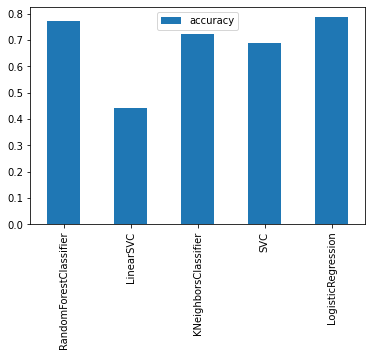

In [13]:
# Create a pandas dataframe with the data as the values of the results dictionary, 
# the index as the keys of the results dictionary and a single column called accuracy
# Be sure to save the dataframe to a variable
results_df = pd.DataFrame(data=results_dict.values(), index=results_dict.keys(), columns=["accuracy"])

results_df.plot.bar();

Let's tune the hyperparameters and see if can improve it.

## Hyperparameter Tuning

For Hyperparameter tuning we can choose either `GridSearchCV` or `RandomizedSearchCV`

In [14]:
# first checking RandomizedSearchCV

#let's created the dictionary of various hyperparameters of LogisticRegression 
log_reg_grid = {"C":np.linspace(-4,4,20),
                "solver":["liblinear"]}

Since we've got a set of hyperparameters we can import RandomizedSearchCV, pass it our dictionary and let it search for the best combination.

In [16]:
from sklearn.model_selection import RandomizedSearchCV

# setup random seed
np.random.seed(42)

# Setup an instance of RandomizedSearchCV with a LogisticRegression estimator,
# our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 5,
                               verbose=1)

# fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1094, in 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [17]:
# find the best parameters of the RandomizedSearchCV instance using best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 3.1578947368421044}

In [18]:
# Score the instance of RandomizedSearchCV instance using best_score_ attribute
rs_log_reg.best_score_

0.818452380952381

After hyperparameter tuning, did the models score improve ? What else could we can try to improve it? Are there any other methods of hyperparameter tuning we can use for LogisticRegression ?

## Classifier Model Evaluation

We've tried to find the best hyperparameters on our model using `RandomizedSearchCV` and so far we've only been evaluating our model using `score()`
function which returns accuracy by default.


But when it comes to classification, we'll likely want to use a few more evaluation metrics, including:
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area Under Curve(AUC)

In [21]:
# we will instantiate the LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(C=3.157, solver="liblinear")

# fit the new instance
clf.fit(X_train, y_train)

LogisticRegression(C=3.157, solver='liblinear')

In [23]:
# now import the sklearn metrics for each of the classification evaluation metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve

In [24]:
# let's make some predictions
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [25]:
# create confusion matrix using confusion matrix function
confusion_matrix(y_test,y_preds)

array([[19,  8],
       [ 4, 30]])

This seems not too much visual, how could you make your confusion matrix more visual ?

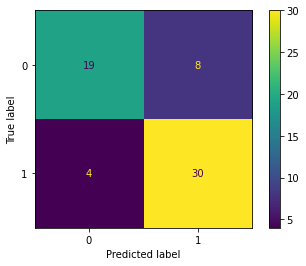

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test, y_test)

In [31]:
# Create a classfication report using classification_report function
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [32]:
# find the precision_score
precision_score(y_test, y_preds)

0.7894736842105263

In [33]:
# find the recall_score
recall_score(y_test, y_preds)

0.8823529411764706

In [34]:
# find the f1_score
f1_score(y_test, y_preds)

0.8333333333333333

/Users/starlord/Desktop/Work/Learn/DataScience/ml-ds-tools-library-introduction/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


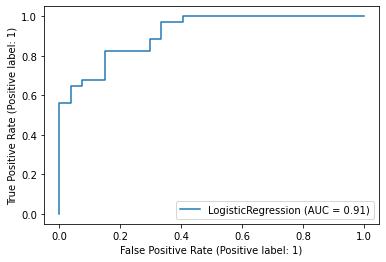

In [36]:
# plot a roc curve
plot_roc_curve(clf, X_test, y_test);

In [37]:
# find cross_val_score
cross_val_score(clf, X, y, scoring="accuracy", cv = 5 )

array([0.81967213, 0.86885246, 0.85245902, 0.86666667, 0.71666667])

In [38]:
# find the mean of the cross_val_score
np.mean(cross_val_score(clf, X, y, scoring="accuracy", cv=5))

0.8248633879781421

We can similarly find the cross_val_score of precision, recall and f1 metrics

In [39]:
#  cross_val_score of precision
cross_val_score(clf, X, y, scoring="precision", cv =5)

array([0.78947368, 0.90322581, 0.85294118, 0.83783784, 0.71052632])

In [40]:
# cross_val_score of recall
cross_val_score(clf, X, y, scoring="recall", cv=5)

array([0.90909091, 0.84848485, 0.87878788, 0.93939394, 0.81818182])

In [41]:
# cross val score of f1
cross_val_score(clf, X, y, scoring="f1", cv=5)

array([0.84507042, 0.875     , 0.86567164, 0.88571429, 0.76056338])

## Exporting and Importing a trained model

In scikit-learn, exporting and importing a trained model is called as model persistence.

In [42]:
# import the dump and load function from joblib library
from joblib import dump, load

In [43]:
# use dump function to export the trained model to file
dump(clf, filename="sk_practice_log_regression_model.joblib")

['sk_practice_log_regression_model.joblib']

In [46]:
# use load function to import the trained model
loaded_clf = load("sk_practice_log_regression_model.joblib")

# evaluation the loaded trained model on the test data
loaded_clf.score(X_test, y_test), clf.score(X_test, y_test)

(0.8032786885245902, 0.8032786885245902)